# Aula 00 - O que é [Python](https://www.python.org/)?

**Objetivos**

- Introdução à linguagem de programação Python.
- Exemplos do seu uso para análise exploratória de dados.
- Utilizar python com uma linguagem "cola."

- A linguagem Python é:
  - interpretada (não compilada)
  - "Dynamically Typed" (não statically-typed)
  - Orientada à `Objetos` e/ou `Funcional`
  - Licença Livre

Instalando python o seu computador (Canopy, EPD, spyder, etc):

```bash
URL=http://repo.continuum.io/miniconda/Miniconda-latest-Linux-x86_64.sh

wget $URL -O miniconda.sh

bash miniconda.sh -b -p $HOME/miniconda

export PATH="$HOME/miniconda/bin:$PATH"

conda update conda

conda config --add ioos

conda info -a
```

- Scientific:
    - [Matplotlib](http://matplotlib.sourceforge.net)
    - [NumPy](http://docs.scipy.org/doc/numpy/reference)
    - [SciPy](http://docs.scipy.org/doc/scipy/reference)
    - [IPython](http://ipython.org/)

- Oceanography
    - [gsw](https://pypi.python.org/pypi/gsw/)
    - [seawater](https://pypi.python.org/pypi/seawater/)
    - [airsea](https://pypi.python.org/pypi/airsea/0.0.1)
    - [oceans](https://pypi.python.org/pypi/oceans)
    - [ctd](https://pypi.python.org/pypi/ctd)
    - [iris](http://scitools.org.uk/iris/docs/latest/index.html)
    - [cartopy](http://scitools.org.uk/cartopy/docs/latest/index.html)

- Ajuda extra:
    - [PyAOS](http://pyaos.johnny-lin.com)
    - [python4oceanographers](http://ocefpaf.github.io/python4oceanographers/)
    - [earthpy](http://earthpy.org/)
    - [Sotware Carpentry](http://software-carpentry.org/index.html)
    - [matlab-numpy](http://mathesaurus.sourceforge.net/matlab-numpy.html)

## Tipos de objetos

In [1]:
Sal, Temp = 35.1, 17 # Salinidade e Temperatura

print(type(Sal))
print(type(Temp))

<type 'float'>
<type 'int'>


In [2]:
u, v = 5., -5.
U = u + 1j*v

print(type(U))

msg = 'OO em ação mostrando números reais {0} e imaginários {1}'.format

print(msg(U.real, U.imag))

# Desafio: Calcular o vetor é o ângulo formado por u+iv.

<type 'complex'>
OO em ação mostrando números reais 5.0 e imaginários -5.0


In [3]:
import numpy as np

np.abs(U), np.rad2deg(np.angle(U))

(7.0710678118654755, -45.0)

In [4]:
False == 0

True

In [5]:
True == 1

True

In [6]:
True == 2

False

In [7]:
False == 1

False

## Strings

In [8]:
print('Texto simples com "aspas" duplas.\n')

print("'Texto simples com 'aspas' simples.\n")

print("""Texto complexo com quebra
de linha, aspas "duplas" e 'simples'.\n""")

print(r"Texto \n 'cru', ideal para Latex $^\circ$.")

Texto simples com "aspas" duplas.

'Texto simples com 'aspas' simples.

Texto complexo com quebra
de linha, aspas "duplas" e 'simples'.

Texto \n 'cru', ideal para Latex $^\circ$.


## String Methods

In [9]:
text = "Um bom aluno sempre..."

text.lower(), text.split(), text.replace('aluno', 'estudante')

('um bom aluno sempre...',
 ['Um', 'bom', 'aluno', 'sempre...'],
 'Um bom estudante sempre...')

In [10]:
print('O valor de pi é {:.2f}'.format(np.pi))
print('O valor de pi é {:.6f}'.format(np.pi))
print('O valor de 10 x pi é {:0.2e}'.format(10*np.pi))

O valor de pi é 3.14
O valor de pi é 3.141593
O valor de 10 x pi é 3.14e+01


## Slicing

In [11]:
T = [17.4, 18.9, 19.5, 22.1, 23.2]
T[0], T[-1], T[::-1], T[::2]

(17.4, 23.2, [23.2, 22.1, 19.5, 18.9, 17.4], [17.4, 19.5, 23.2])

In [12]:
T[1:3]

[18.9, 19.5]

In [13]:
T[2:]

[19.5, 22.1, 23.2]

## Alguns métodos de listas:

- `.append`
- `.extend`
- `.sort`
- `.remove`
- `.reverse`
- `.insert`

In [14]:
lista = list(range(10))
print(lista)

lista.append(10)
print(lista)

lista.insert(4, 11)
print(lista)

lista.sort()
print(lista)

lista.extend(['elemento extra'])
print(lista)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 11, 4, 5, 6, 7, 8, 9, 10]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'elemento extra']


## Dicionários

In [15]:
ctd = dict(S=[35.5, 34.76, 33.2],
           T=[17.4, 18.9, 19.5],
           AOU=[320, 330, 350])


ctd.keys(), ctd.values()

(['S', 'AOU', 'T'], [[35.5, 34.76, 33.2], [320, 330, 350], [17.4, 18.9, 19.5]])

## Sets

In [16]:
set(['joseph', 'maria', 'pedro', 'maria'])

{'joseph', 'maria', 'pedro'}

### Namespaces

**Direto da wikipedia:**

*A namespace (sometimes also called a name scope) is an abstract container or
environment created to hold a logical grouping of unique identifiers or symbols
(i.e., names).*

**O que interessa para nós?**

- Namespaces mantém o código organizado.
- Evita conflitos gerados por funções de mesmo nome.
- Torna o código "declarativo" e consequentemente mais legível.

**Matlab vs Python (Namespaces)**

Matlab:

```matlab
w1 = window(@gausswin, N, 2.5)
% Opa! O resultados é diferente do que eu esperava. Argh, a minha função
% window está abaixo da original do Matlab no "path".
```

Python:

```python
from oceans.timeseries import window
w1 = window(N, 2.5, type='gausswin')
# Sem dúvida essa era a que eu queria!
```

## Módulos

Como vocês já notaram, em Python temos que importar (declarar) tudo que vamos
utilizar.

In [17]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [18]:
import math

math.cos(math.pi)

-1.0

In [19]:
from math import sin, pi

sin(pi)

1.2246467991473532e-16

In [20]:
import numpy

numpy.tanh([numpy.pi])

array([ 0.99627208])

### Exemplo prático de ler dados ASCII em Python

- Nossos dados estão organizados na pasta **data/CTD**.
- São arquivos ASCII que podem ser abertos em qualquer editor de texto.
- Leia o arquivo "leia_me.txt" para maiores descrições do formato dos dados.


In [21]:
fname = './data/CTD/estacao08.dat'

with open(fname, 'r') as f:
    lines = f.readlines()
    data = lines[0].strip().split()[3:]
    depth = float(data[0])
    lat = float(data[1])
    lon = float(data[2])
    print("Prof.: %s m\nLongitude: %2.4f deg\nLatitude: %2.4f deg" %
          (depth, lon, lat))

Prof.: 138.0 m
Longitude: -45.0500 deg
Latitude: -25.1517 deg


In [22]:
import os
from glob import glob


lista = glob(os.path.join('data', 'CTD', '*.dat'))
lista

['data/CTD/estacao01.dat',
 'data/CTD/estacao02.dat',
 'data/CTD/estacao03.dat',
 'data/CTD/estacao04.dat',
 'data/CTD/estacao05.dat',
 'data/CTD/estacao06.dat',
 'data/CTD/estacao07.dat',
 'data/CTD/estacao08.dat',
 'data/CTD/estacao09.dat',
 'data/CTD/estacao10.dat',
 'data/CTD/estacao11.dat',
 'data/CTD/estacao12.dat',
 'data/CTD/estacao13.dat',
 'data/CTD/estacao14.dat',
 'data/CTD/estacao15.dat']

In [23]:
def break_lines(line):
    return [float(num) for num in line.strip().split()]


def get_topo(url='./data/etopo5.nc'):
    etopodata = Dataset(url)
    topoin = etopodata.variables['ROSE'][:]
    lons = etopodata.variables['ETOPO05_X'][:]
    lats = etopodata.variables['ETOPO05_Y'][:]
    topoin, lons = shiftgrid(180., topoin, lons, start=False)
    return topoin, lons, lats

In [24]:
depth, lat, lon = [], [], []


for fname in lista:
    with open(fname, 'r') as f:
        lines = f.readlines()
        d, la, lo = break_lines(lines[0])[3:]
        lon.append(lo)
        lat.append(la)
        depth.append(d)

In [25]:
import seawater as sw

dist, angle = sw.dist(lon, lat)

dist = np.r_[0, dist.cumsum()]

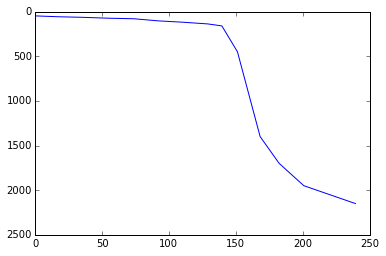

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(dist, depth)
plt.gca().invert_yaxis()

Matlab
```python
for k = 1:length(files)
    files(k).name
end
```


Python
```python
for fname in lista:
    print("%s" % fname)
```